## Examining the Impact of Firm Sizes on Product and Process Innovations Among Nigerian SMEs

This project seeks to understand the impact of firm size on their innovation performance.  The datasets was taken from the World Bank Enterprise Survey conducted by the Enterprise Analysis Unit of the Develoment Economics Global Indicators Department of World Bank.  The data was preprocessed in Power BI before it was imported to Python for analysis.  The project found that small firm sizes were more likely to generate innovations than large firms in Nigeria.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('innovation.csv')

In [4]:
df.head()

,Unnamed: 0,ID,sector,Size,Large_Firm,Ownership Structure,Share Private Dom. Individ,Female_BM,Mgrs_educ,Product,Process,Firm_Age,Wkr_Exp_Mgr,Geo_Zone,Mgr_Shareholding,Foreign Board Member,Foreign_BM
0,0,588900,Retail,Small >=,No,Sole Proprietorship,100,No,Secondary,1,1,30 - 49 Years,10 - 20 Years,NC,Yes,NaN,No
1,1,588966,Retail,Micro <5,No,Sole Proprietorship,100,Yes,Graduate,0,0,< 10 Years,10 - 20 Years,NC,Yes,NaN,No
2,2,589023,Retail,Micro <5,No,Sole Proprietorship,100,Yes,Graduate,0,0,< 10 Years,10 - 20 Years,SE,Yes,NaN,No
3,3,589025,Retail,Small >=,No,Sole Proprietorship,100,No,Vocation,0,0,< 10 Years,10 - 20 Years,NC,Yes,NaN,No
4,4,589027,Retail,Small >=,No,Sole Proprietorship,100,No,Other po,0,1,< 10 Years,10 - 20 Years,NC,Yes,NaN,No


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'sector', 'Size', 'Large_Firm',
       'Ownership Structure', 'Share Private Dom. Individ', 'Female_BM',
       'Mgrs_educ', 'Product', 'Process', 'Firm_Age', 'Wkr_Exp_Mgr',
       'Geo_Zone', 'Mgr_Shareholding', 'Foreign Board Member', 'Foreign_BM'],
      dtype='object')

In [6]:
variables = ['sector', 'Size', 'Large_Firm',
       'Ownership Structure', 'Share Private Dom. Individ', 'Female_BM',
       'Mgrs_educ', 'Product', 'Process', 'Firm_Age', 'Wkr_Exp_Mgr',
       'Geo_Zone', 'Mgr_Shareholding','Foreign_BM']

In [7]:
data = df[variables]

In [8]:
data.head()

,sector,Size,Large_Firm,Ownership Structure,Share Private Dom. Individ,Female_BM,Mgrs_educ,Product,Process,Firm_Age,Wkr_Exp_Mgr,Geo_Zone,Mgr_Shareholding,Foreign_BM
0,Retail,Small >=,No,Sole Proprietorship,100,No,Secondary,1,1,30 - 49 Years,10 - 20 Years,NC,Yes,No
1,Retail,Micro <5,No,Sole Proprietorship,100,Yes,Graduate,0,0,< 10 Years,10 - 20 Years,NC,Yes,No
2,Retail,Micro <5,No,Sole Proprietorship,100,Yes,Graduate,0,0,< 10 Years,10 - 20 Years,SE,Yes,No
3,Retail,Small >=,No,Sole Proprietorship,100,No,Vocation,0,0,< 10 Years,10 - 20 Years,NC,Yes,No
4,Retail,Small >=,No,Sole Proprietorship,100,No,Other po,0,1,< 10 Years,10 - 20 Years,NC,Yes,No


In [9]:
data.shape

(646, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   sector                      646 non-null    object
 1   Size                        646 non-null    object
 2   Large_Firm                  646 non-null    object
 3   Ownership Structure         646 non-null    object
 4   Share Private Dom. Individ  646 non-null    int64 
 5   Female_BM                   646 non-null    object
 6   Mgrs_educ                   646 non-null    object
 7   Product                     646 non-null    int64 
 8   Process                     646 non-null    int64 
 9   Firm_Age                    646 non-null    object
 10  Wkr_Exp_Mgr                 646 non-null    object
 11  Geo_Zone                    646 non-null    object
 12  Mgr_Shareholding            646 non-null    object
 13  Foreign_BM                  646 non-null    object

#### Ownership structure and innovation

In [11]:
Ownership_crosstab = pd.crosstab(data['Ownership Structure'], data['Product'], normalize='index')
print(Ownership_crosstab)

Product                     0         1
Ownership Structure                    
Limited              0.346154  0.653846
OTHER (S             0.625000  0.375000
Partners             0.274510  0.725490
Shareholders         0.480769  0.519231
Sole Proprietorship  0.408644  0.591356


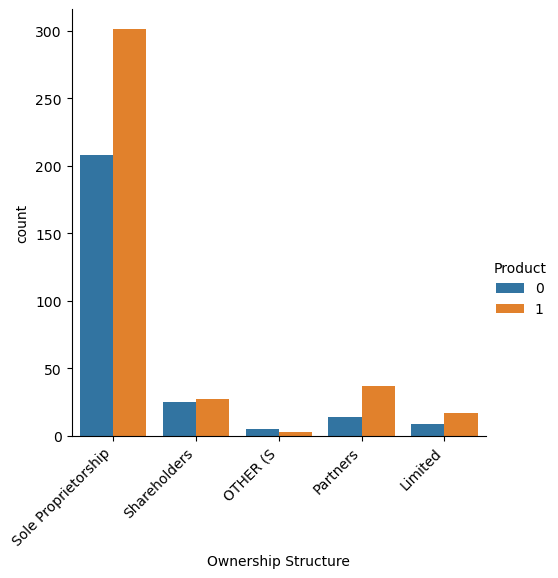

In [12]:
sns.catplot(data=data,kind='count',x='Ownership Structure',hue='Product')
plt.xticks(rotation=45, ha='right');

In [13]:
Ownership_crosstab_process = pd.crosstab(data['Ownership Structure'], data['Process'], normalize='index')
print(Ownership_crosstab_process)

Process                     0         1
Ownership Structure                    
Limited              0.192308  0.807692
OTHER (S             0.500000  0.500000
Partners             0.431373  0.568627
Shareholders         0.442308  0.557692
Sole Proprietorship  0.497053  0.502947


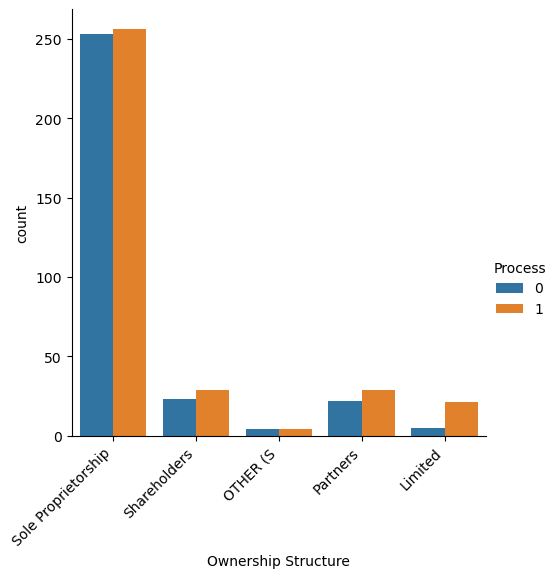

In [14]:
sns.catplot(data=data,kind='count',x='Ownership Structure',hue='Process')
plt.xticks(rotation=45, ha='right');

#### Large Firm Size and Innovation

Given that size of firms can influence innovation, we have represented size in this project as affiliation to large firm because the bulk of the firms surveyed were small and medium enterprises.  Hence, those of them that has affiliation to large firms were considered as large firms.

In [15]:
Size_crosstab = pd.crosstab(data['Large_Firm'], data['Product'], normalize='index')
print(Size_crosstab)

Product            0         1
Large_Firm                    
No          0.452500  0.547500
Yes         0.325203  0.674797


In [16]:
Size_crosstab = pd.crosstab(data['Large_Firm'], data['Process'], normalize='index')
print(Size_crosstab)

Process            0         1
Large_Firm                    
No          0.515000  0.485000
Yes         0.410569  0.589431


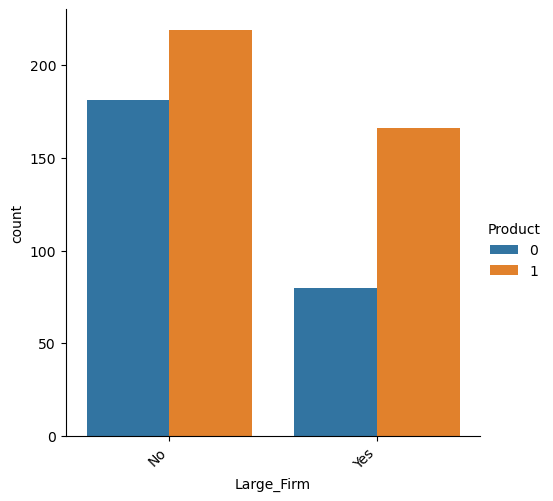

In [17]:
sns.catplot(data=data,kind='count',x='Large_Firm',hue='Product')
plt.xticks(rotation=45, ha='right');

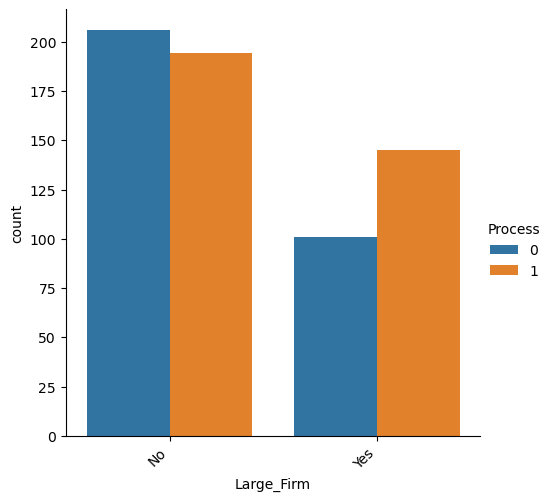

In [18]:
sns.catplot(data=data,kind='count',x='Large_Firm',hue='Process')
plt.xticks(rotation=45, ha='right');

#### Female board members and innovations

Including female as a member of the board signifies board diversity which can bring different perspectives on how a firm is run and thereby influnce innovation and performance of the firms.

In [19]:
FM_Pr_crosstab = pd.crosstab(data['Female_BM'], data['Product'], normalize='index')
print(FM_Pr_crosstab)

Product           0         1
Female_BM                    
No         0.428571  0.571429
Yes        0.338983  0.661017


In [20]:
FM_Proc_crosstab = pd.crosstab(data['Female_BM'], data['Product'], normalize='index')
print(FM_Proc_crosstab)

Product           0         1
Female_BM                    
No         0.428571  0.571429
Yes        0.338983  0.661017


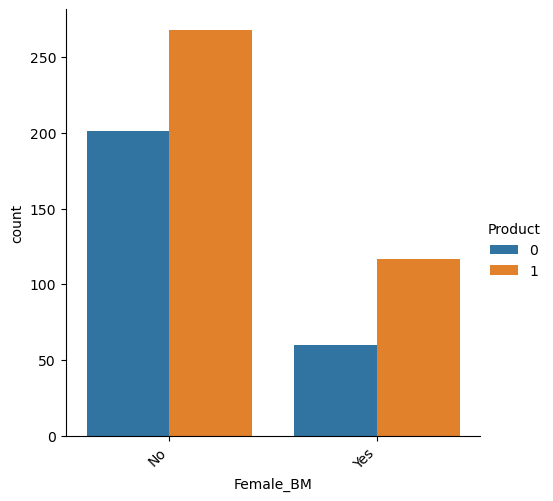

In [21]:
sns.catplot(data=data,kind='count',x='Female_BM',hue='Product')
plt.xticks(rotation=45, ha='right');

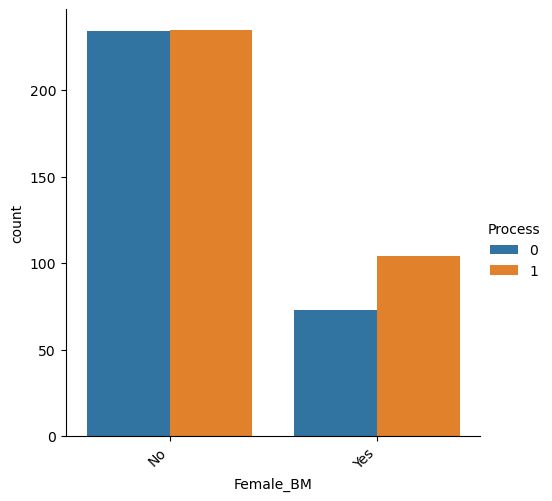

In [22]:
sns.catplot(data=data,kind='count',x='Female_BM',hue='Process')
plt.xticks(rotation=45, ha='right');

#### Managers' Level of Education

The education of the manager can influence the level of innovation performance of a firm.  Those that are well educated may be motivated to source for information and knowledge that drives innovation in the firm.

In [23]:
mgr_crosstab = pd.crosstab(data['Mgrs_educ'], data['Product'], normalize='index')
print(mgr_crosstab)

Product              0         1
Mgrs_educ                       
Graduate      0.383065  0.616935
No Education  0.600000  0.400000
Other po      0.214286  0.785714
Primary       0.384615  0.615385
Secondary     0.418060  0.581940
Vocation      0.462963  0.537037


In [24]:
mgrs_crosstab = pd.crosstab(data['Mgrs_educ'], data['Process'], normalize='index')
print(mgr_crosstab)

Product              0         1
Mgrs_educ                       
Graduate      0.383065  0.616935
No Education  0.600000  0.400000
Other po      0.214286  0.785714
Primary       0.384615  0.615385
Secondary     0.418060  0.581940
Vocation      0.462963  0.537037


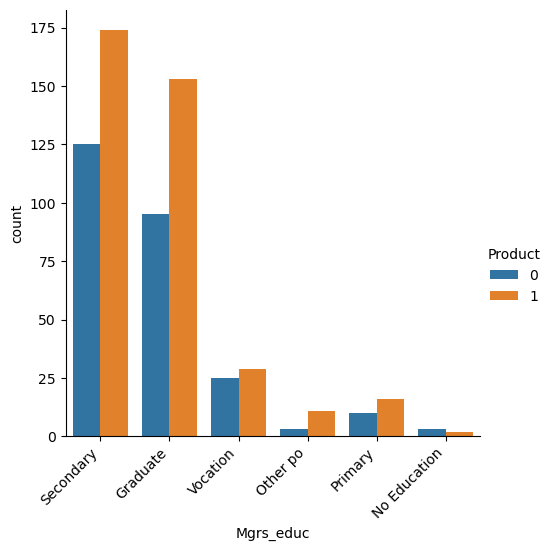

In [25]:
sns.catplot(data=data,kind='count',x='Mgrs_educ',hue='Product')
plt.xticks(rotation=45, ha='right');

#### Firm Age

The age of the firm can positively impact on innovative performance of the firm.

In [26]:
Age_crosstab = pd.crosstab(data['Firm_Age'], data['Product'], normalize='index')
print(Age_crosstab)

Product               0         1
Firm_Age                         
10 - 29 Years  0.500000  0.500000
30 - 49 Years  0.458333  0.541667
50 - 69 Years  0.529412  0.470588
< 10 Years     0.380753  0.619247
> 70 Years     0.666667  0.333333


In [27]:
Ages_crosstab = pd.crosstab(data['Firm_Age'], data['Process'], normalize='index')
print(Ages_crosstab)

Process               0         1
Firm_Age                         
10 - 29 Years  0.500000  0.500000
30 - 49 Years  0.534722  0.465278
50 - 69 Years  0.529412  0.470588
< 10 Years     0.453975  0.546025
> 70 Years     0.666667  0.333333


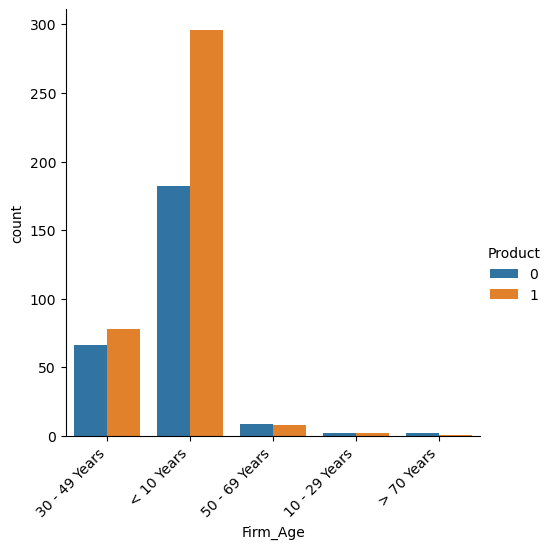

In [28]:
sns.catplot(data=data,kind='count',x='Firm_Age',hue='Product')
plt.xticks(rotation=45, ha='right');

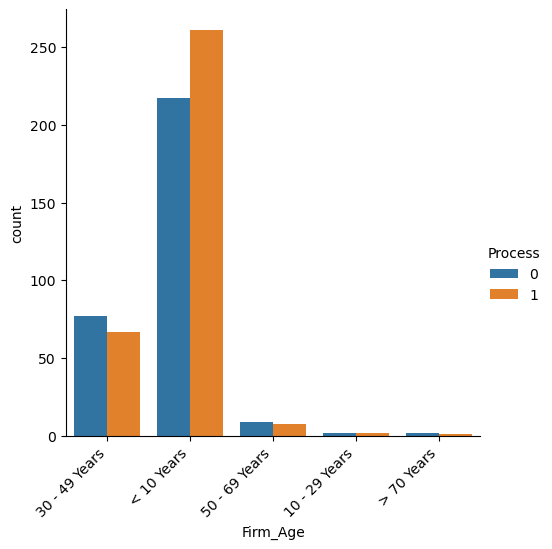

In [29]:
sns.catplot(data=data,kind='count',x='Firm_Age',hue='Process')
plt.xticks(rotation=45, ha='right');

#### Managers' Work Experience

The working experience of the manager can positively influence the innovative performance of the firms.  

In [30]:
exp_crosstab = pd.crosstab(data['Wkr_Exp_Mgr'], data['Product'], normalize='index')
print(exp_crosstab)

Product               0         1
Wkr_Exp_Mgr                      
10 - 20 Years  0.408451  0.591549
20 - 29 Years  0.401961  0.598039
30 - 49 Years  0.547619  0.452381
< 10 Years     0.372093  0.627907
> 50 Years     0.333333  0.666667


In [31]:
expr_crosstab = pd.crosstab(data['Wkr_Exp_Mgr'], data['Process'], normalize='index')
print(expr_crosstab)

Process               0         1
Wkr_Exp_Mgr                      
10 - 20 Years  0.514085  0.485915
20 - 29 Years  0.470588  0.529412
30 - 49 Years  0.619048  0.380952
< 10 Years     0.395349  0.604651
> 50 Years     0.666667  0.333333


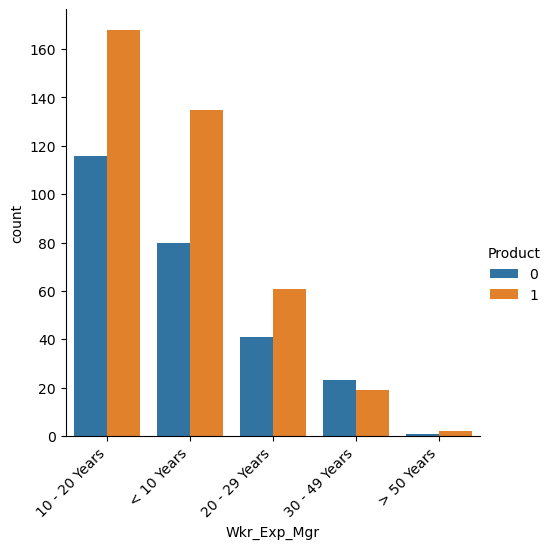

In [32]:
sns.catplot(data=data,kind='count',x='Wkr_Exp_Mgr',hue='Product')
plt.xticks(rotation=45, ha='right');

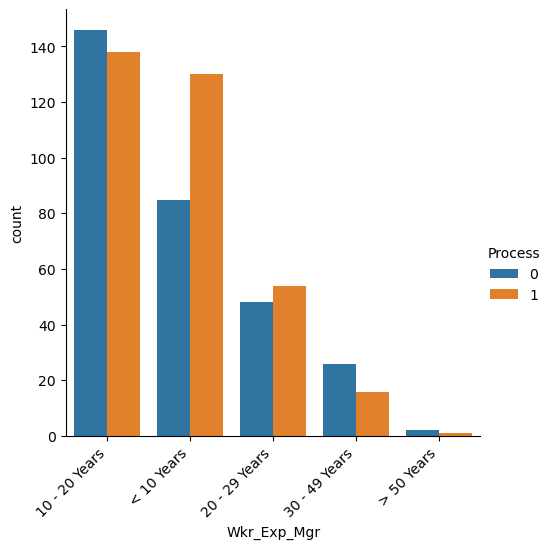

In [33]:
sns.catplot(data=data,kind='count',x='Wkr_Exp_Mgr',hue='Process')
plt.xticks(rotation=45, ha='right');

#### Location of the firm:  Geo-Political Zone of the Firm

The firms surveyed comes from all the Geo-Political Zones in the Nigeria.  However, apart from the North-East which seemm to be underrepresented due to may be insecurity in that region, all other zones were well represented.

In [34]:
loc_crosstab = pd.crosstab(data['Geo_Zone'], data['Product'], normalize='index')
print(loc_crosstab)

Product          0         1
Geo_Zone                    
NC        0.421053  0.578947
NE        0.266667  0.733333
NW        0.431624  0.568376
Others    0.520000  0.480000
SE        0.462963  0.537037
SS        0.181818  0.818182
SW        0.320000  0.680000


In [35]:
loct_crosstab = pd.crosstab(data['Geo_Zone'], data['Process'], normalize='index')
print(loct_crosstab)

Process          0         1
Geo_Zone                    
NC        0.355263  0.644737
NE        0.333333  0.666667
NW        0.508547  0.491453
Others    0.400000  0.600000
SE        0.555556  0.444444
SS        0.318182  0.681818
SW        0.493333  0.506667


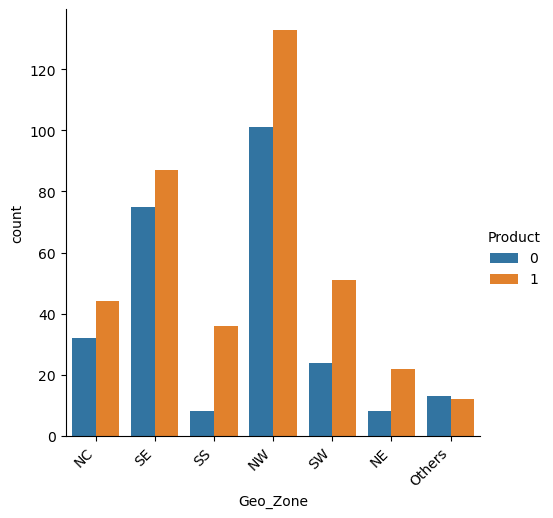

In [36]:
sns.catplot(data=data,kind='count',x='Geo_Zone',hue='Product')
plt.xticks(rotation=45, ha='right');

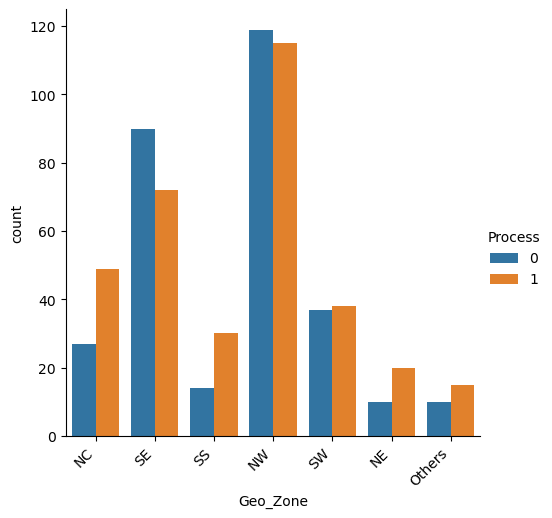

In [37]:
sns.catplot(data=data,kind='count',x='Geo_Zone',hue='Process')
plt.xticks(rotation=45, ha='right');

#### Managerial Shareholding

This was defined as a binary variable in which firms that were wholely owned by managers were categorized 1 and otherwise zero.

In [38]:
msh_crosstab = pd.crosstab(data['Mgr_Shareholding'], data['Product'], normalize='index')
print(msh_crosstab)

Product                  0         1
Mgr_Shareholding                    
No                0.397959  0.602041
Yes               0.406667  0.593333


In [39]:
mshr_crosstab = pd.crosstab(data['Mgr_Shareholding'], data['Process'], normalize='index')
print(mshr_crosstab)

Process                  0         1
Mgr_Shareholding                    
No                0.392857  0.607143
Yes               0.511111  0.488889


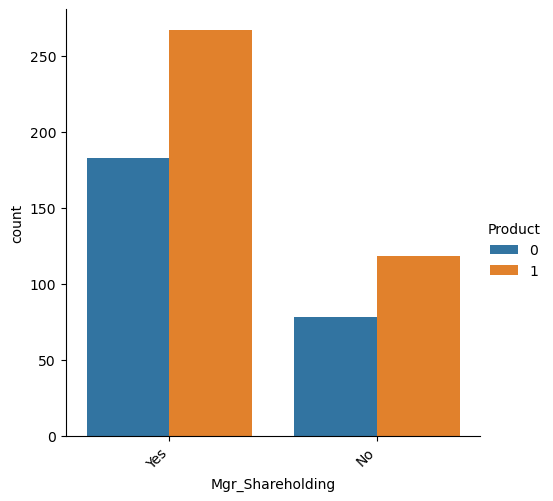

In [40]:
sns.catplot(data=data,kind='count',x='Mgr_Shareholding',hue='Product')
plt.xticks(rotation=45, ha='right');

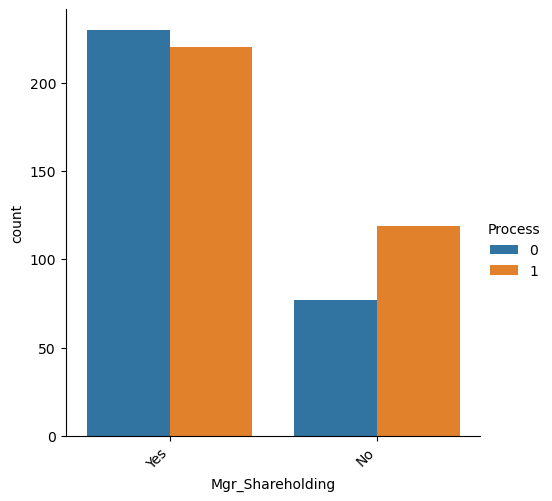

In [41]:
sns.catplot(data=data,kind='count',x='Mgr_Shareholding',hue='Process')
plt.xticks(rotation=45, ha='right');

#### Foreign Board Members

The presence of a foreign board member on the board may attract foreign technical ideas that may stimulate innovations 

In [42]:
fb_crosstab = pd.crosstab(data['Foreign_BM'], data['Product'], normalize='index')
print(fb_crosstab)

Product            0         1
Foreign_BM                    
No          0.424036  0.575964
Yes         0.360976  0.639024


In [43]:
fbm_crosstab = pd.crosstab(data['Foreign_BM'], data['Process'], normalize='index')
print(fbm_crosstab)

Process            0         1
Foreign_BM                    
No          0.501134  0.498866
Yes         0.419512  0.580488


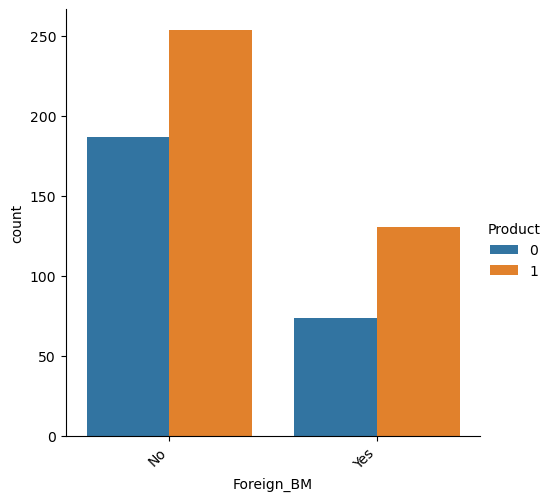

In [44]:
sns.catplot(data=data,kind='count',x='Foreign_BM',hue='Product')
plt.xticks(rotation=45, ha='right');

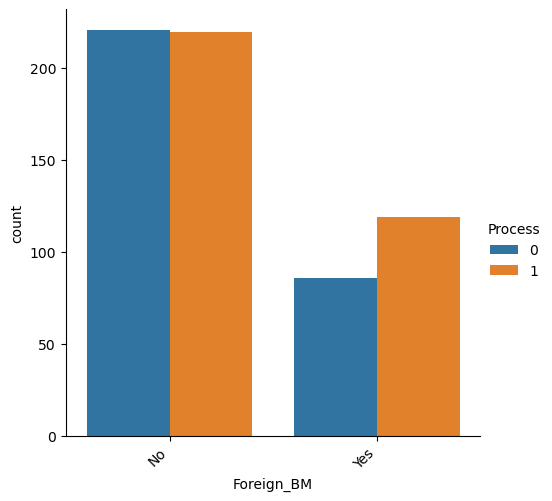

In [45]:
sns.catplot(data=data,kind='count',x='Foreign_BM',hue='Process')
plt.xticks(rotation=45, ha='right');

In [46]:
data.head()

,sector,Size,Large_Firm,Ownership Structure,Share Private Dom. Individ,Female_BM,Mgrs_educ,Product,Process,Firm_Age,Wkr_Exp_Mgr,Geo_Zone,Mgr_Shareholding,Foreign_BM
0,Retail,Small >=,No,Sole Proprietorship,100,No,Secondary,1,1,30 - 49 Years,10 - 20 Years,NC,Yes,No
1,Retail,Micro <5,No,Sole Proprietorship,100,Yes,Graduate,0,0,< 10 Years,10 - 20 Years,NC,Yes,No
2,Retail,Micro <5,No,Sole Proprietorship,100,Yes,Graduate,0,0,< 10 Years,10 - 20 Years,SE,Yes,No
3,Retail,Small >=,No,Sole Proprietorship,100,No,Vocation,0,0,< 10 Years,10 - 20 Years,NC,Yes,No
4,Retail,Small >=,No,Sole Proprietorship,100,No,Other po,0,1,< 10 Years,10 - 20 Years,NC,Yes,No


In [47]:
model = smf.logit('Product ~ sector + Large_Firm + Female_BM + Mgrs_educ + Firm_Age + Wkr_Exp_Mgr + Geo_Zone + Mgr_Shareholding + Foreign_BM',data=data)
results = model.fit()

         Current function value: 0.587915
         Iterations: 35


In [48]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:                Product   No. Observations:                  646
Model:                          Logit   Df Residuals:                      598
Method:                           MLE   Df Model:                           47
Date:                Sat, 10 Feb 2024   Pseudo R-squ.:                  0.1285
Time:                        06:56:39   Log-Likelihood:                -379.79
converged:                      False   LL-Null:                       -435.80
Covariance Type:            nonrobust   LLR p-value:                 3.151e-07
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -1.6787      1.603     -1.048      0.295      -4.820       1.462
sector[T.Chemical]                 -24.5149   2.33e+05     -0.000

In [54]:
odd_results = np.exp(results.params)
print(odd_results)

Intercept                              0.347227
sector[T.Chemical]                     0.002410
sector[T.Constructions]                5.645294
sector[T.Electronics]                  5.106460
sector[T.Food]                         3.674757
sector[T.Furniture]                    4.094670
sector[T.Garments]                    10.136382
sector[T.Hotel an]                     2.574479
sector[T.IT]                           3.967560
sector[T.Leather]                     10.505010
sector[T.Machiner]                     3.167590
sector[T.Metal Fabrications]           4.493100
sector[T.Non Metal Fabrications]       3.363396
sector[T.Paper]                     1715.136041
sector[T.Plastics]                     1.840191
sector[T.Precisio]                     0.001231
sector[T.Publishings]                  7.609779
sector[T.Refined]                   1871.469210
sector[T.Retail]                       3.318239
sector[T.Services]                     1.490053
sector[T.Textiles]                     3

In [49]:
model2 = smf.logit('Process ~ sector + Large_Firm + Female_BM + Mgrs_educ + Firm_Age + Wkr_Exp_Mgr + Geo_Zone + Mgr_Shareholding + Foreign_BM',data=data)
results2 = model2.fit()

         Current function value: 0.612969
         Iterations: 35


In [50]:
print(results2.summary())

                           Logit Regression Results                           
Dep. Variable:                Process   No. Observations:                  646
Model:                          Logit   Df Residuals:                      598
Method:                           MLE   Df Model:                           47
Date:                Sat, 10 Feb 2024   Pseudo R-squ.:                  0.1141
Time:                        06:56:39   Log-Likelihood:                -395.98
converged:                      False   LL-Null:                       -446.98
Covariance Type:            nonrobust   LLR p-value:                 6.076e-06
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.5752      1.450     -0.397      0.692      -3.417       2.266
sector[T.Chemical]                   0.6115      1.342      0.456

In [55]:
odd_results2 = np.exp(results2.params)
print(odd_results2)

Intercept                           5.626040e-01
sector[T.Chemical]                  1.843134e+00
sector[T.Constructions]             9.323560e+00
sector[T.Electronics]               1.748013e+01
sector[T.Food]                      5.580439e+00
sector[T.Furniture]                 4.617797e+00
sector[T.Garments]                  4.739907e+00
sector[T.Hotel an]                  2.686056e+00
sector[T.IT]                        7.694400e+00
sector[T.Leather]                   2.552678e+01
sector[T.Machiner]                  6.081438e-01
sector[T.Metal Fabrications]        4.795167e+00
sector[T.Non Metal Fabrications]    3.396928e+00
sector[T.Paper]                     2.477775e+00
sector[T.Plastics]                  1.818781e+00
sector[T.Precisio]                  1.475985e+10
sector[T.Publishings]               1.176938e+01
sector[T.Refined]                   8.620927e+10
sector[T.Retail]                    3.892948e+00
sector[T.Services]                  5.633614e+00
sector[T.Textiles]  